### Etape 1
Change ton pass dans fonctions env()
```python
os.chdir(f'/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian')
```
### Etape 2
Exécute le code one by one par cellule

In [4]:
def env():
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd 
    import sys
    import os

    os.chdir(f'/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian')
    print(os.getcwd())
    def check_path_exists(Path,Message):
        if not os.path.exists(Path):
            print(Message)
            sys.exit(1)

    # Cette partie permet d'ajouter le dossier parent au path, pour pouvoir importer les modules que nous avons créés. ça peut être soit un chemin
    # absolu, soit un chemin relatif. Ici, c'est un chemin absolu.
    Path_Modules = "./Modules"
    Path_Models = "./Models"
    check_path_exists(Path_Modules,"Le chemin spécifié pour importer les modules n'existe pas. Il faut surement le modifier.")

    sys.path.append(Path_Modules)
    sys.path.append(Path_Models)
    # Importer les module

    return None

env()
from Preprocessing import *
from Mobilenet import *
from Train import *

/home/wang/Bureau/INSA-Toulouse/DL/P/Projet_HDDL_2/Commun/Commun_Qian


In [5]:

def model_labels(Type = "Indications"):
    Image_Information_Path = "./Anotations/"
    Name_Image_Information = "Image_Information.csv"
    Name_Image_Information_Train = "Image_Information_Train.csv"
    Name_Image_Information_Test = "Image_Information_Test.csv"

    # Checker si le fichier existe
    #check_path_exists(Image_Information_Path,"Le chemin spécifié pour le DataFrame n'existe pas. Il faut surement le modifier.")

    # Charger le DataFrame
    Image_Information_Dataframe = pd.read_csv(Image_Information_Path+Name_Image_Information)
    Image_Information_Dataframe_Train = pd.read_csv(Image_Information_Path+Name_Image_Information_Train)
    Image_Information_Dataframe_Test = pd.read_csv(Image_Information_Path+Name_Image_Information_Test)


    Image_Information_Dataframe_Test = Image_Information_Dataframe_Test[Image_Information_Dataframe_Test["Type"]== Type]
    Image_Information_Dataframe_Train = Image_Information_Dataframe_Train[Image_Information_Dataframe_Train["Type"]== Type]
    Image_Information_Dataframe = Image_Information_Dataframe[Image_Information_Dataframe["Type"]== Type]

    print(f"Nombre d'images dans le dataset: {Image_Information_Dataframe.shape[0]}")
    print(f"Nombre d'images dans le dataset de train: {Image_Information_Dataframe_Train.shape[0]}")
    print(f"Nombre d'images dans le dataset de test: {Image_Information_Dataframe_Test.shape[0]}")


    # Preprocessing des images
    resize=True
    size=(224,224)
    normalize=True
    # Nb_Images_To_Import = 5
    Frac_Images_To_Import = 1

    images_train, types_train, sublabels_train, labels_train = import_images_tensor(Image_Information_Dataframe_Train.sample(frac=Frac_Images_To_Import),"Relative_Path", "Type", "Sublabel", "Label",resize=resize, size=size,normalize=normalize)
    images_test , types_test, sublabels_test, labels_test = import_images_tensor(Image_Information_Dataframe_Test.sample(frac=Frac_Images_To_Import),"Relative_Path", "Type", "Sublabel", "Label",resize=resize, size=size,normalize=normalize)



    # # # Création des dictionnaires d'encodage
    save_dicts = False
    Path_Save_Dicts = f"./Encoding_Dictionaries/{Type}/"

    types_to_int , int_to_types = Create_Encoding_Label_Dictionary(types_train)
    sublabels_to_int , int_to_sublabels = Create_Encoding_Label_Dictionary(sublabels_train,save=save_dicts, path=Path_Save_Dicts,title_label_to_int='sublabels_to_int',title_int_to_label='int_to_sublabels')
    labels_to_int , int_to_labels = Create_Encoding_Label_Dictionary(labels_train,save=save_dicts, path=Path_Save_Dicts,title_label_to_int='labels_to_int',title_int_to_label='int_to_labels')

    # # Encodage des labels
    types_encoded_train,types_encoded_test = encode_labels(types_train, types_to_int) , encode_labels(types_test, types_to_int)
    sublabels_encoded_train,sublabels_encoded_test = encode_labels(sublabels_train, sublabels_to_int) , encode_labels(sublabels_test, sublabels_to_int)
    labels_encoded_train,labels_encoded_test = encode_labels(labels_train, labels_to_int) , encode_labels(labels_test, labels_to_int)


    # # Creating Dataloaders : Train and Test
    dataloader_train, _ = create_dataloader(images_train, types_encoded_train, sublabels_encoded_train, labels_encoded_train, batch_size=32, test_size=0, shuffle=True)
    dataloader_test ,_= create_dataloader(images_test, types_encoded_test, sublabels_encoded_test, labels_encoded_test, batch_size=32, test_size=0, shuffle=True)

    # # load the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = torch.load(f'./Saved_Models/Model_{Type}.pth').to(device)
    model.eval()

    return model, int_to_labels, int_to_sublabels, int_to_types, dataloader_test, dataloader_train

model, int_to_labels, int_to_sublabels, int_to_types, dataloader_test, dataloader_train = model_labels("Dangers")


Nombre d'images dans le dataset: 965
Nombre d'images dans le dataset de train: 771
Nombre d'images dans le dataset de test: 194
Importing images


Processing image ../Donnees/Dangers/Priorite_A_Droite/img_25.png: 100%|██████████| 771/771 [00:05<00:00, 142.76it/s]                                   


Converting Imported images to tensor
Importing images


Processing image ../Donnees/Dangers/Carrefour_Sens_Giratoire/img_31.png: 100%|██████████| 194/194 [00:01<00:00, 136.46it/s]                           
/tmp/ipykernel_8554/2476244204.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on 

Converting Imported images to tensor
torch.Size([771, 224, 224, 3])
torch.Size([194, 224, 224, 3])


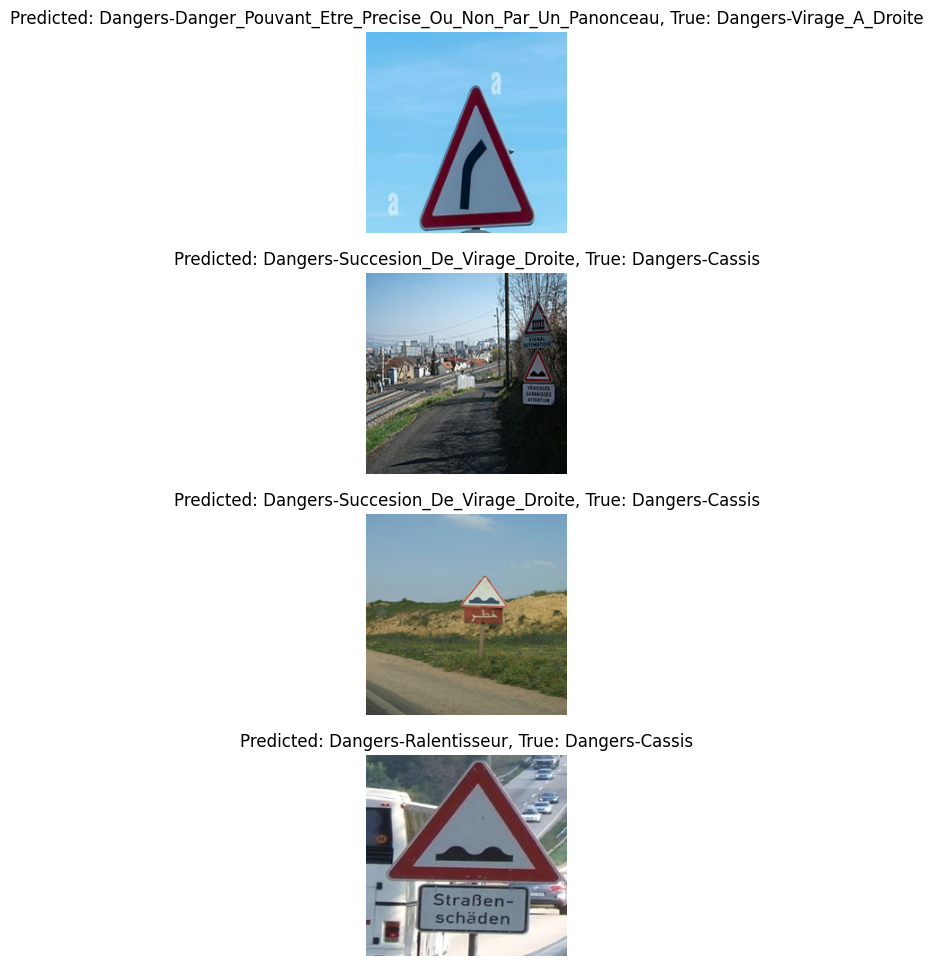

In [4]:
# REprende tous les mauvais predictions
def get_all_false_predictions(model,dataloader):
    with torch.no_grad():
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.eval()
        all_false_predictions = []
        for i, data in enumerate(dataloader):
            images, types, sublabels, labels = data
            images, types, sublabels, labels = images.to(device), types.to(device), sublabels.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            for i in range(len(predicted)):
                if predicted[i] != labels[i]:
                    all_false_predictions.append((images[i],predicted[i],labels[i]))
                if len(all_false_predictions) == 4:
                    return all_false_predictions
    return all_false_predictions

all_false_predictions = get_all_false_predictions(model,dataloader_test)

# Afficher les mauvaises predictions

def imshow(img):
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.subplots(4,1,figsize=(12,12))
for i in range(len(all_false_predictions)):
    plt.subplot(4,1,i+1)
    imshow(all_false_predictions[i][0])
    plt.title(f"Predicted: {int_to_labels[int(all_false_predictions[i][1])]}, True: {int_to_labels[int(all_false_predictions[i][2])]}")
    plt.axis('off')

    